# 基于Python的ADF单位根检验方法——时间序列平稳检验

ADF检验总结一句话：如果序列是平稳的，则不存在单位根， 否则就会存在单位根。
ADF检验的原假设是存在单位根，因此如果得到的统计量显著小于3个置信度（1%，5%，10%）的临界统计值时，说明是拒绝原假设的。另外是看P-value是否非常接近0（4位小数基本即可。）

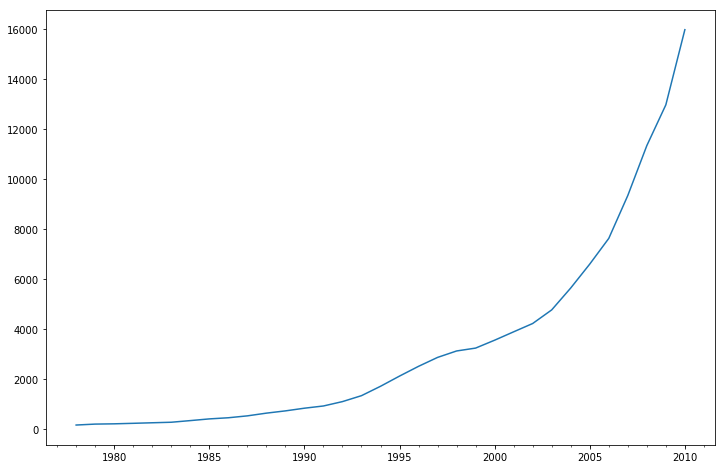

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

time_series = pd.Series([151.0, 188.46, 199.38, 219.75, 241.55, 262.58, 328.22, 396.26, 442.04, 517.77, 626.52, 717.08, 824.38, 913.38, 1088.39, 1325.83, 1700.92, 2109.38, 2499.77, 2856.47, 3114.02, 3229.29, 3545.39, 3880.53, 4212.82, 4757.45, 5633.24, 6590.19, 7617.47, 9333.4, 11328.92, 12961.1, 15967.61])
time_series.index = pd.Index(sm.tsa.datetools.dates_from_range('1978','2010'))
time_series.plot(figsize=(12,8))
plt.show()

由上图我们可以看出，这个时间序列是呈指数形式的，波动性比较大，不是稳定的时间序列，一般对于这种指数形式的数据，可以对其取对数，将其转化为线性趋势。

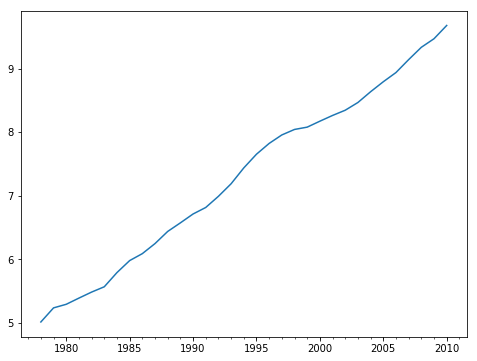

In [9]:
time_series = np.log(time_series)
time_series.plot(figsize=(8,6))
plt.show()

由上图可以看出，去了对数之后的时间路径图明显具有线性趋势，为了确定其稳定性，对取对数后的数据进行 adf 检验

In [10]:
t=sm.tsa.stattools.adfuller(time_series, )
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value         0.807369
p-value                      0.991754
Lags Used                           1
Number of Observations Used        31
Critical Value(1%)           -3.66143
Critical Value(5%)           -2.96053
Critical Value(10%)          -2.61932


由上表可知，t 统计量要大于任何置信度的临界值，因此认为该序列是非平稳的，所以再对序列进行差分处理，发现差分之后的序列基本达到稳定，如下图所示，并且通过了 ADF 检验，检验结果见下表。

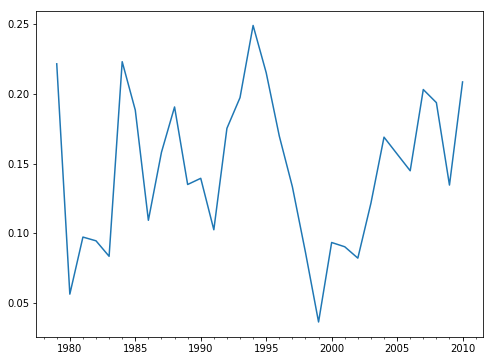

                                  value
Test Statistic Value           -3.52276
p-value                      0.00742139
Lags Used                             0
Number of Observations Used          31
Critical Value(1%)             -3.66143
Critical Value(5%)             -2.96053
Critical Value(10%)            -2.61932


In [11]:
time_series = time_series.diff(1)
time_series = time_series.dropna(how=any)
time_series.plot(figsize=(8,6))
plt.show()
t=sm.tsa.stattools.adfuller(time_series)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

 p和q 自动定阶的话，可以采用

In [12]:
(p, q) =(sm.tsa.arma_order_select_ic(time_series,max_ar=3,max_ma=3,ic='aic')['aic_min_order'])

d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model

残差检验和白噪声检验

In [15]:
arma_mod = ARMA(time_series,(0,1,1)).fit(disp=-1,method='mle')
resid = arma_mod.resid
t=sm.tsa.stattools.adfuller(resid)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value           -3.114
p-value                      0.025534
Lags Used                           1
Number of Observations Used        30
Critical Value(1%)           -3.66992
Critical Value(5%)           -2.96407
Critical Value(10%)          -2.62117


d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


模型预测

In [16]:
arma_model = sm.tsa.ARMA(time_series,(0,1)).fit(disp=-1,maxiter=100)

predict_data = arma_model.predict(start=str(1979), end=str(2010+3), dynamic = False)

d:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [18]:
time_series

1979-12-31    0.221606
1980-12-31    0.056327
1981-12-31    0.097278
1982-12-31    0.094586
1983-12-31    0.083479
1984-12-31    0.223128
1985-12-31    0.188386
1986-12-31    0.109330
1987-12-31    0.158131
1988-12-31    0.190650
1989-12-31    0.135007
1990-12-31    0.139444
1991-12-31    0.102520
1992-12-31    0.175303
1993-12-31    0.197339
1994-12-31    0.249131
1995-12-31    0.215225
1996-12-31    0.169805
1997-12-31    0.133388
1998-12-31    0.086328
1999-12-31    0.036348
2000-12-31    0.093386
2001-12-31    0.090324
2002-12-31    0.082161
2003-12-31    0.121580
2004-12-31    0.168973
2005-12-31    0.156897
2006-12-31    0.144862
2007-12-31    0.203155
2008-12-31    0.193759
2009-12-31    0.134594
2010-12-31    0.208610
dtype: float64

In [17]:
predict_data

1979-12-31    0.148903
1980-12-31    0.180234
1981-12-31    0.083328
1982-12-31    0.156691
1983-12-31    0.113660
1984-12-31    0.131687
1985-12-31    0.201155
1986-12-31    0.141603
1987-12-31    0.130448
1988-12-31    0.164734
1989-12-31    0.163724
1990-12-31    0.132480
1991-12-31    0.152886
1992-12-31    0.120100
1993-12-31    0.180473
1994-12-31    0.158549
1995-12-31    0.200706
1996-12-31    0.157206
1997-12-31    0.156108
1998-12-31    0.135910
1999-12-31    0.120548
2000-12-31    0.100750
2001-12-31    0.144692
2002-12-31    0.117811
2003-12-31    0.128515
2004-12-31    0.144937
2005-12-31    0.162649
2006-12-31    0.145614
2007-12-31    0.148473
2008-12-31    0.180175
2009-12-31    0.156672
2010-12-31    0.136277
2011-12-31    0.190269
2012-12-31    0.148903
2013-12-31    0.148903
Freq: A-DEC, dtype: float64